In [1]:
import pandas as pd
import numpy as np

df = pd.read_pickle('electronika_clean.pkl')
df

,Unnamed: 0,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,...,Quant,RowPrice,RowDiscount,RowSum,Brand,TN,TK,NomFullPath,Week,Nom_ID
0,10,1303000511_TT,556669108109_lm16@gmail.com,55574953-52525755535375,Онлайн-Резерв.,2016-03-01,10:46:45.000,201603,2016-03-05 09:16:49.000,2016-03-01 00:00:00.000,...,1,2970,0,2970,Ника,Товары для дома,Хозтовары,Техника для дома/Техника для ухода за одеждой/...,9,90364
1,12,1303000512_TT,556669108109_lm16@gmail.com,55574953-52525755535375,Онлайн-Резерв.,2016-03-01,10:47:19.000,201603,2016-03-01 10:59:43.000,2016-03-01 00:00:00.000,...,1,19490,0,19490,DeLonghi,Мелкая бытовая техника,Приготовление пищи,Техника для кухни/Приготовление пищи/Мультиварки/,9,45673
2,14,1303000513_TT,666668112117_pu19@ya.ru,55575655-50555350534877,Онлайн-Резерв.,2016-03-11,16:06:56.000,201603,2016-03-11 20:11:18.000,2016-03-12 00:00:00.000,...,1,19990,0,19990,Samsung,ТВ-Аудио,Телевизоры LCD,"Телевизоры, аудио, видео/Телевизоры/LED телеви...",10,120757
3,16,1303000514_TT,666668112117_pu19@ya.ru,55575653-57485657505272,Онлайн-Резерв.,2016-03-15,18:13:33.000,201603,2016-03-15 18:17:35.000,2016-03-22 00:00:00.000,...,1,23680,0,23680,СМК,Мебель,Мягкая мебель,Мебель/Мягкая мебель/Диваны/Трехместные диваны/,11,264580
4,28,1303000520_TT,56666668112117_pu26@yanded.ru,55575449-54535553535073,Онлайн-Резерв.,2016-03-01,00:01:46.000,201603,2016-03-04 15:09:38.000,2016-03-02 00:00:00.000,...,1,2420,0,2420,HP,Аксессуары,Картриджи и бумага,"Компьютеры, ноутбуки, планшеты/Оргтехника/Расх...",9,76102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183067,357019,5898089_BX,6666449117_1u9@bk.ru,55574957-51495048515075,Онлайн-Резерв.,2016-04-30,23:51:37.000,201604,2016-05-03 12:55:07.000,2016-05-02 00:00:00.000,...,1,899,0,899,Saturn,Климат,Вентиляторы бытовые,Техника для дома/Климатическая техника/Кондици...,17,38755
183068,357021,5898095_BX,666661118109_vm27@yahoo.com,55575452-55554849505278,Онлайн-Резерв.,2016-04-30,23:54:03.000,201604,2016-05-04 19:43:40.000,2016-05-07 00:00:00.000,...,1,1090,0,1090,Case Logic,Аксессуары,Аксессуары для фото/видео,Фото- и видеотехника/Аксессуары для фото и вид...,17,31908
183069,357023,5898099_BX,3110116_nt16@pisem.net,55574948-50554849554878,Онлайн-Резерв.,2016-04-30,23:56:02.000,201604,2016-05-01 11:57:42.000,2016-05-08 00:00:00.000,...,1,6859,0,6859,ELIKOR,Крупная бытовая техника,Встраиваемая техника,Встраиваемая техника/Вытяжки/,17,140459
183070,357024,5898102_BX,55666665102117_fu13@list.ru,55575648-51484956545071,Онлайн-Резерв.,2016-04-30,23:56:38.000,201604,2016-05-06 20:18:49.000,2016-05-05 00:00:00.000,...,1,9120,0,9120,FORWARD,Спорт и активный отдых,Велосипеды и аксессуары,Товары для спорта и отдыха/Велосипеды и аксесс...,17,295956


Text(0.5, 1.0, 'Goods total')

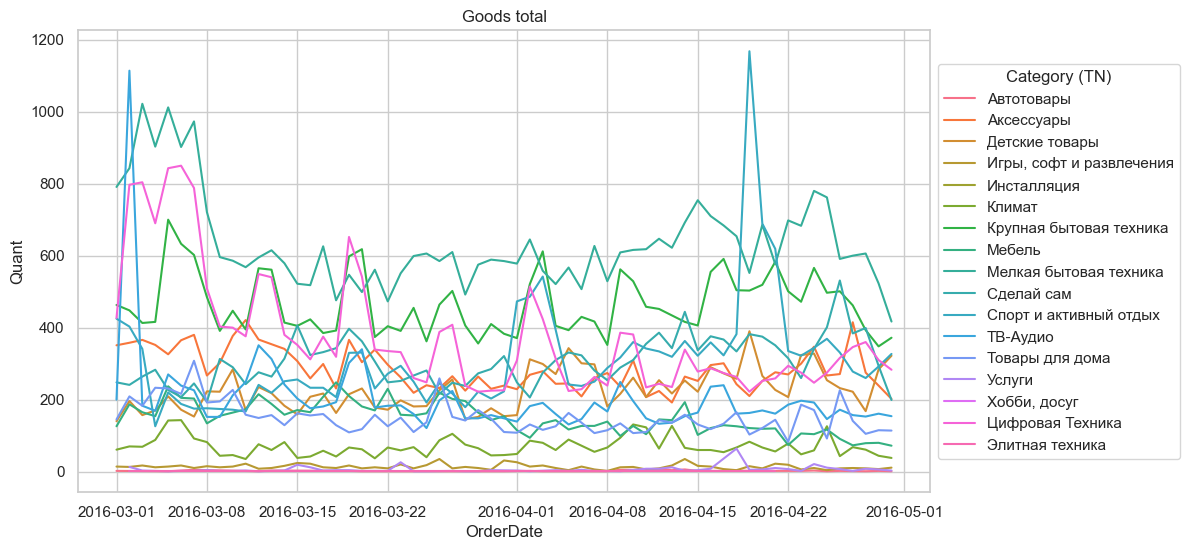

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

placed = df[['TN', 'OrderDate', 'Quant']].groupby(['TN', 'OrderDate']).sum().reset_index()
placed['OrderDate'] = pd.to_datetime(placed['OrderDate'])

sns.set(style="whitegrid")
plt.figure(figsize=(11, 6))
sns.lineplot(data=placed, x='OrderDate', y='Quant', hue='TN')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Category (TN)")
plt.title('Goods total')


Text(0.5, 1.0, 'Goods sold')

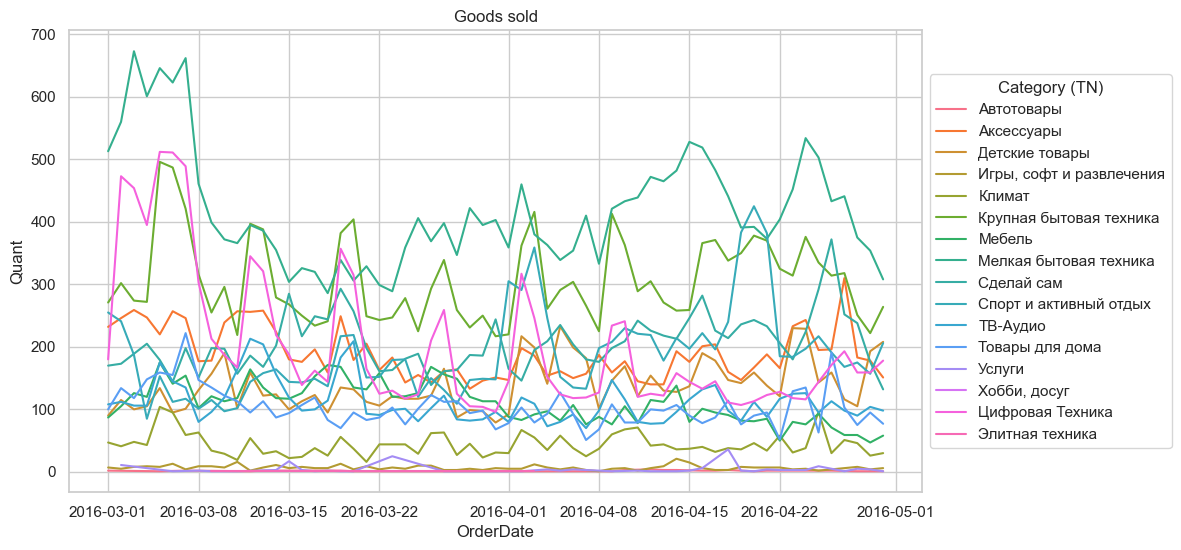

In [3]:
sold = df[df['Status_ID'] == 14][['TN', 'OrderDate', 'Quant']].groupby(['TN', 'OrderDate']).sum().reset_index()
sold['OrderDate'] = pd.to_datetime(sold['OrderDate'])

plt.figure(figsize=(11, 6))
sns.lineplot(data=sold, x='OrderDate', y='Quant', hue='TN')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Category (TN)")
plt.title('Goods sold')


# Без учета акций

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error


def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')

### Крупная бытовая техника

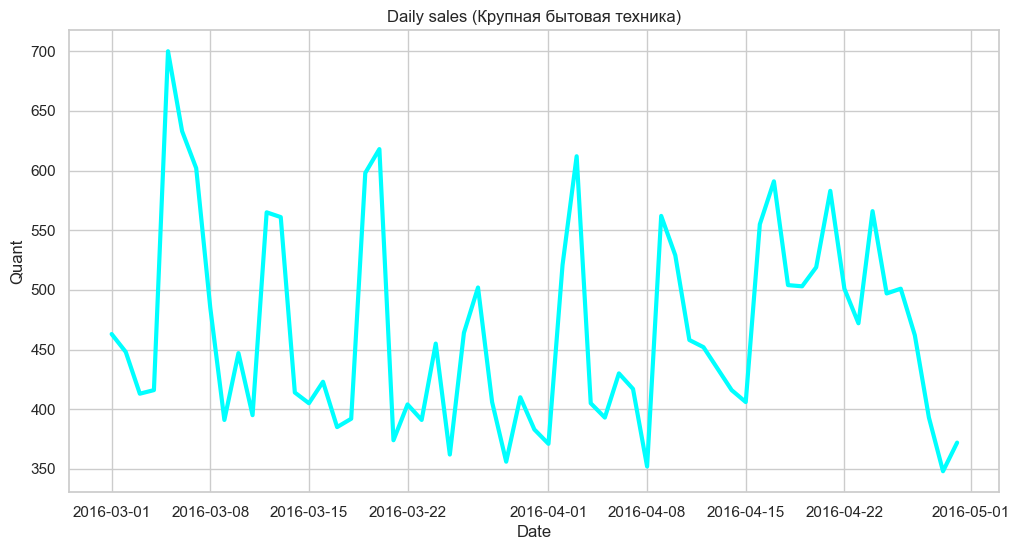

ADF Statistic: -2.5742600916889495
p-value: 0.09843472874909398
Non-Stationary


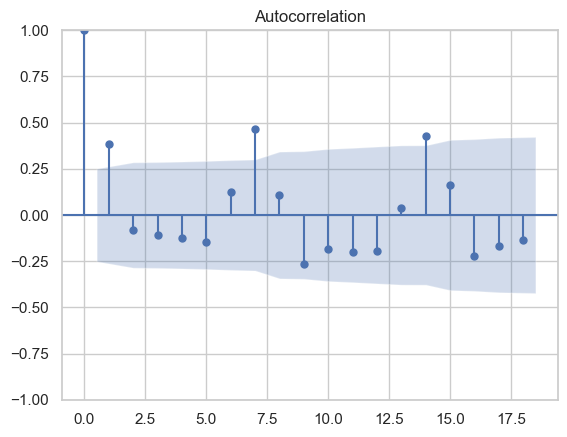

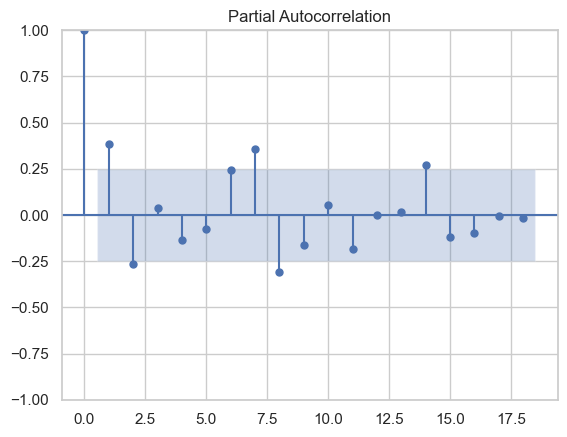

In [7]:
category_name = 'Крупная бытовая техника'

placed1 = placed[placed['TN'] == f'{category_name}'][['OrderDate', 'Quant']].set_index('OrderDate')
daily_sales = placed1.resample('D').sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Quant'], linewidth=3,c='cyan')
plt.title(f"Daily sales ({category_name})")
plt.xlabel("Date")
plt.ylabel("Quant")
plt.show()

check_stationarity(daily_sales['Quant'])

plot_acf(daily_sales)
plot_pacf(daily_sales)
plt.show()

In [8]:
from sklearn.metrics import mean_absolute_percentage_error

# Define SARIMA parameters
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 7  # Assuming weekly seasonality

# Fit the SARIMA model
model = SARIMAX(daily_sales.iloc[:-14], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

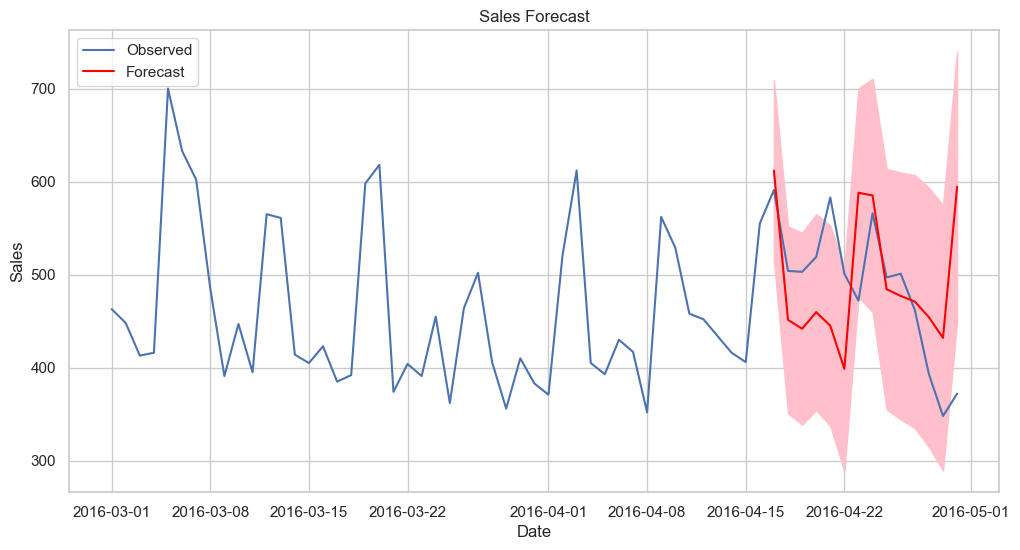

MAE: 70.19703993618751
MSE: 8208.262476488886
MAPE: 15.601439954798705


In [9]:
# Forecast future values
forecast_periods = 14  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


observed = daily_sales[-14:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
mape = mean_absolute_percentage_error(observed, forecast_mean) * 100.0
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')

### Мелкая бытовая техника

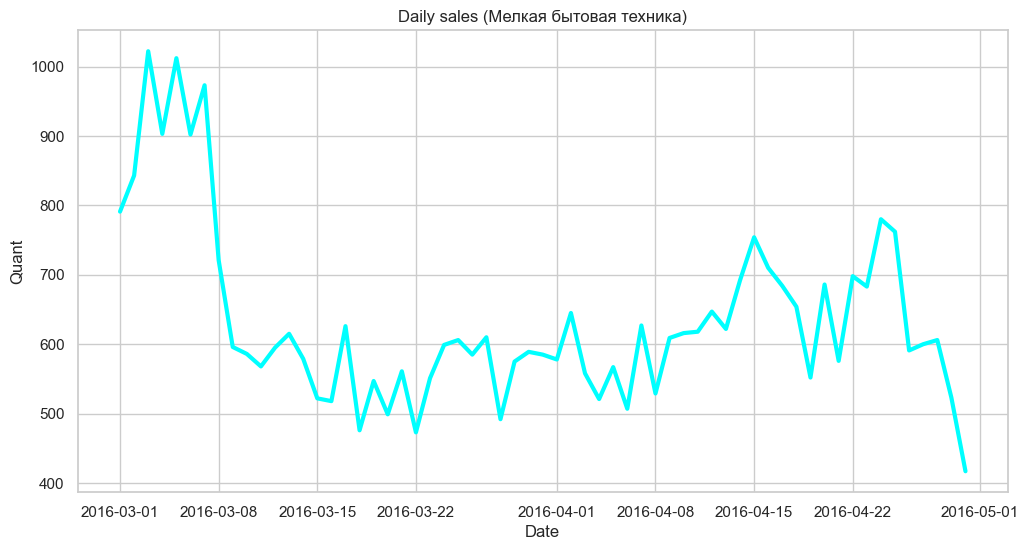

ADF Statistic: -1.8979020398554898
p-value: 0.33304870015795524
Non-Stationary


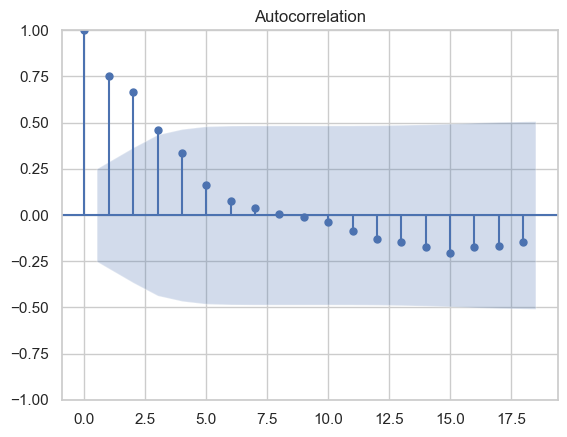

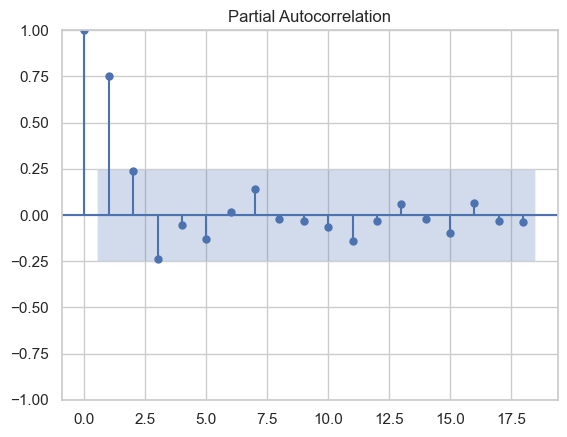

In [13]:
category_name = 'Мелкая бытовая техника'

placed1 = placed[placed['TN'] == f'{category_name}'][['OrderDate', 'Quant']].set_index('OrderDate')
daily_sales = placed1.resample('D').sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Quant'], linewidth=3,c='cyan')
plt.title(f"Daily sales ({category_name})")
plt.xlabel("Date")
plt.ylabel("Quant")
plt.show()

check_stationarity(daily_sales['Quant'])

plot_acf(daily_sales)
plot_pacf(daily_sales)
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_percentage_error

# Define SARIMA parameters
p, d, q = 2, 1, 1
P, D, Q, s = 2, 1, 1, 7  # Assuming weekly seasonality

# Fit the SARIMA model
model = SARIMAX(daily_sales.iloc[:-14], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

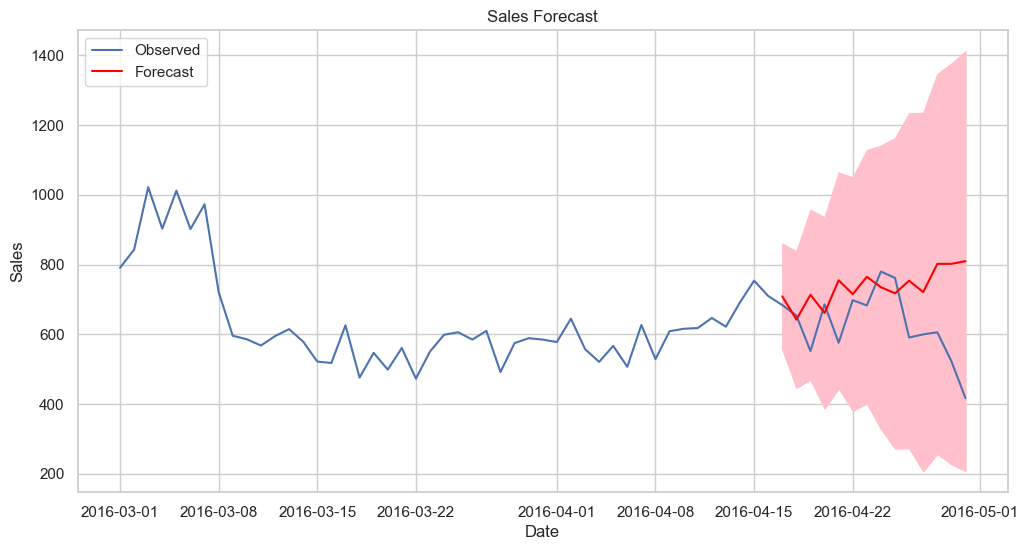

MAE: 124.4790541361283
MSE: 27327.865985666744
MAPE: 23.083700884574228


In [15]:
# Forecast future values
forecast_periods = 14  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


observed = daily_sales[-14:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
mape = mean_absolute_percentage_error(observed, forecast_mean) * 100.0
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')

### Сделай сам

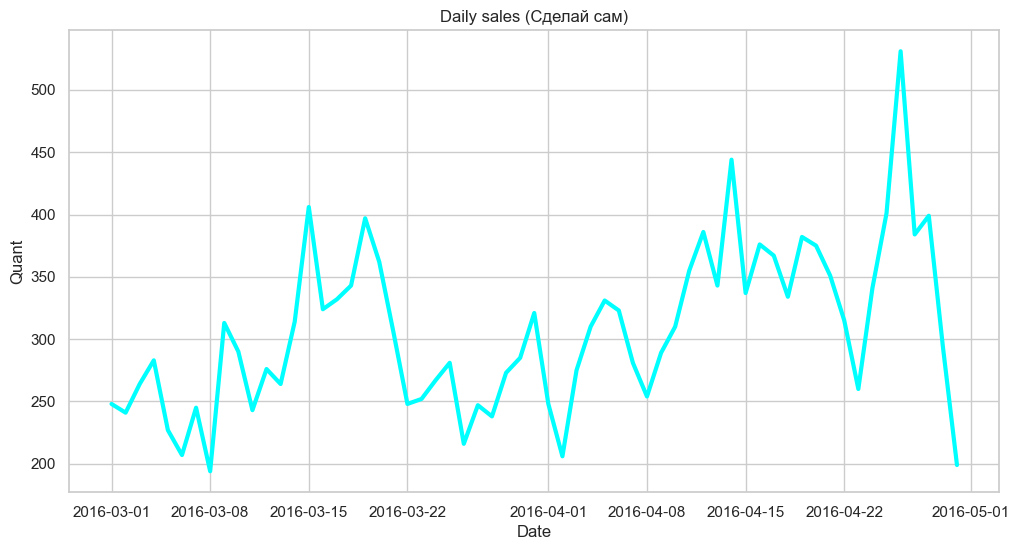

ADF Statistic: -3.4685485637263493
p-value: 0.008832541908316829
Stationary


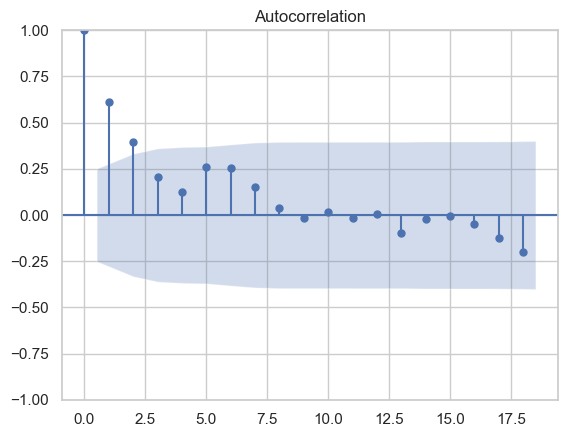

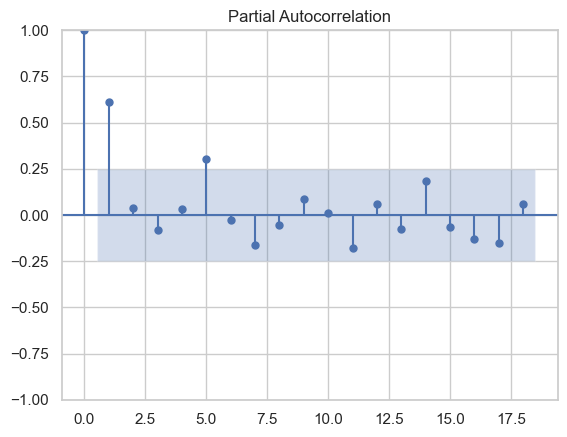

In [90]:
category_name = 'Сделай сам'

placed1 = placed[placed['TN'] == f'{category_name}'][['OrderDate', 'Quant']].set_index('OrderDate')
daily_sales = placed1.resample('D').sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Quant'], linewidth=3,c='cyan')
plt.title(f"Daily sales ({category_name})")
plt.xlabel("Date")
plt.ylabel("Quant")
plt.show()

check_stationarity(daily_sales['Quant'])

plot_acf(daily_sales)
plot_pacf(daily_sales)
plt.show()

In [91]:
from sklearn.metrics import mean_absolute_percentage_error

# Define SARIMA parameters
p, d, q = 2, 1, 1
P, D, Q, s = 2, 1, 1, 7  # Assuming weekly seasonality

# Fit the SARIMA model
model = SARIMAX(daily_sales.iloc[:-14], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

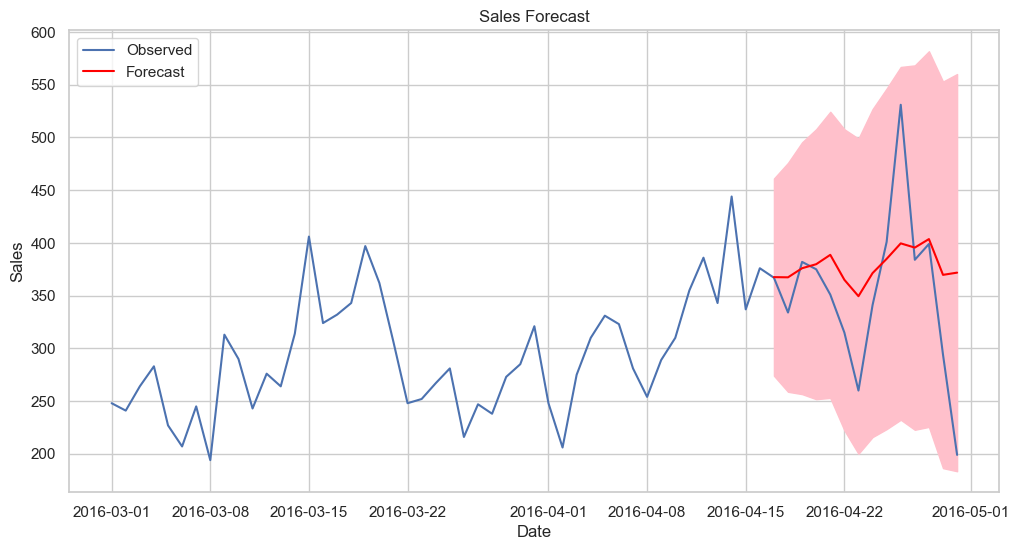

MAE: 47.4741078194864
MSE: 4808.436253571154
MAPE: 16.321107801625807


In [92]:
# Forecast future values
forecast_periods = 14  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


observed = daily_sales[-14:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
mape = mean_absolute_percentage_error(observed, forecast_mean) * 100.0
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')

# С учетом акций

In [16]:
actions_values = df['Actions'].value_counts().index
actions_set = set()
for action in actions_values:
    values = action.split(',')
    for value in values:
        actions_set.add(value)

for col in list(actions_set):
    df[col] = df['Actions'].apply(lambda x: int(str(x).find(col) != -1))
df

,Unnamed: 0,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,...,NomFullPath,Week,Nom_ID,СкидкаДляСпособаОплаты,СкидкаНаКомплект,БесплатнаяДоставкаНаСуммуКорзины,СкидкаСуммойПроцентомСЛимитом,СкидкаНаТоварПоПромоСлову,НайдёшьДешевле,Подарки
0,10,1303000511_TT,556669108109_lm16@gmail.com,55574953-52525755535375,Онлайн-Резерв.,2016-03-01,10:46:45.000,201603,2016-03-05 09:16:49.000,2016-03-01 00:00:00.000,...,Техника для дома/Техника для ухода за одеждой/...,9,90364,0,0,0,0,0,0,0
1,12,1303000512_TT,556669108109_lm16@gmail.com,55574953-52525755535375,Онлайн-Резерв.,2016-03-01,10:47:19.000,201603,2016-03-01 10:59:43.000,2016-03-01 00:00:00.000,...,Техника для кухни/Приготовление пищи/Мультиварки/,9,45673,0,0,0,0,0,0,0
2,14,1303000513_TT,666668112117_pu19@ya.ru,55575655-50555350534877,Онлайн-Резерв.,2016-03-11,16:06:56.000,201603,2016-03-11 20:11:18.000,2016-03-12 00:00:00.000,...,"Телевизоры, аудио, видео/Телевизоры/LED телеви...",10,120757,0,0,1,0,0,0,0
3,16,1303000514_TT,666668112117_pu19@ya.ru,55575653-57485657505272,Онлайн-Резерв.,2016-03-15,18:13:33.000,201603,2016-03-15 18:17:35.000,2016-03-22 00:00:00.000,...,Мебель/Мягкая мебель/Диваны/Трехместные диваны/,11,264580,0,0,1,0,0,0,0
4,28,1303000520_TT,56666668112117_pu26@yanded.ru,55575449-54535553535073,Онлайн-Резерв.,2016-03-01,00:01:46.000,201603,2016-03-04 15:09:38.000,2016-03-02 00:00:00.000,...,"Компьютеры, ноутбуки, планшеты/Оргтехника/Расх...",9,76102,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183067,357019,5898089_BX,6666449117_1u9@bk.ru,55574957-51495048515075,Онлайн-Резерв.,2016-04-30,23:51:37.000,201604,2016-05-03 12:55:07.000,2016-05-02 00:00:00.000,...,Техника для дома/Климатическая техника/Кондици...,17,38755,0,0,0,0,0,0,0
183068,357021,5898095_BX,666661118109_vm27@yahoo.com,55575452-55554849505278,Онлайн-Резерв.,2016-04-30,23:54:03.000,201604,2016-05-04 19:43:40.000,2016-05-07 00:00:00.000,...,Фото- и видеотехника/Аксессуары для фото и вид...,17,31908,0,0,0,0,0,0,0
183069,357023,5898099_BX,3110116_nt16@pisem.net,55574948-50554849554878,Онлайн-Резерв.,2016-04-30,23:56:02.000,201604,2016-05-01 11:57:42.000,2016-05-08 00:00:00.000,...,Встраиваемая техника/Вытяжки/,17,140459,0,0,1,0,0,0,0
183070,357024,5898102_BX,55666665102117_fu13@list.ru,55575648-51484956545071,Онлайн-Резерв.,2016-04-30,23:56:38.000,201604,2016-05-06 20:18:49.000,2016-05-05 00:00:00.000,...,Товары для спорта и отдыха/Велосипеды и аксесс...,17,295956,0,0,0,0,0,0,0


### Крупная бытовая техника

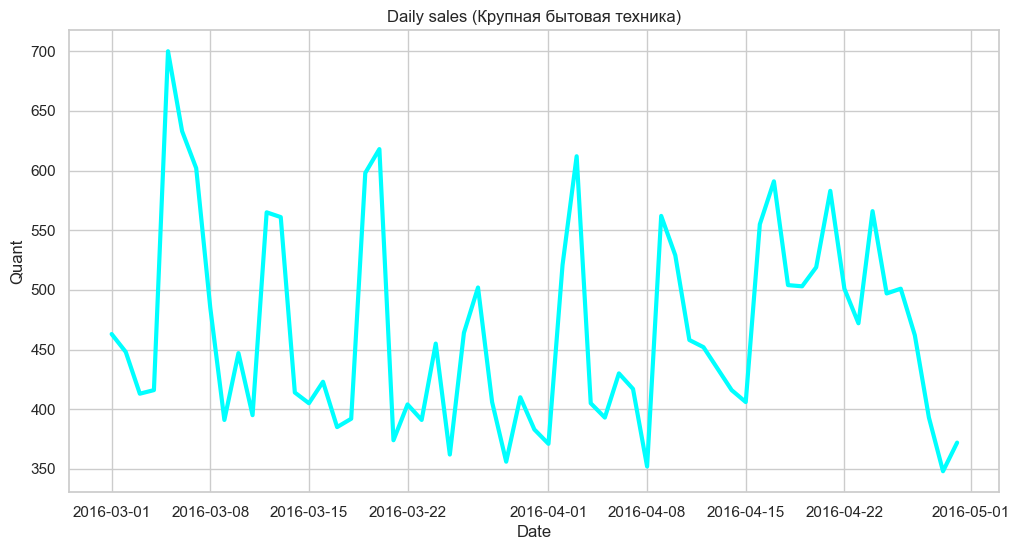

ADF Statistic: -2.5742600916889495
p-value: 0.09843472874909398
Non-Stationary


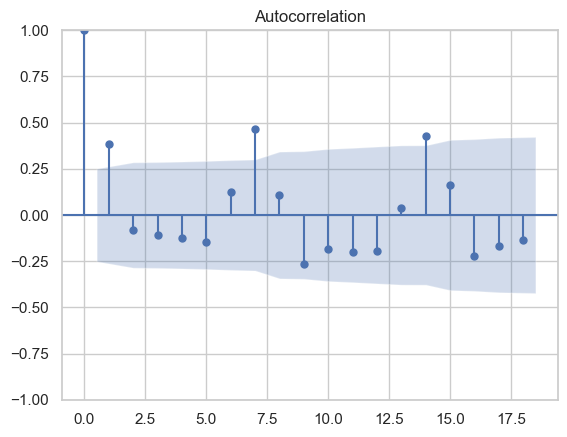

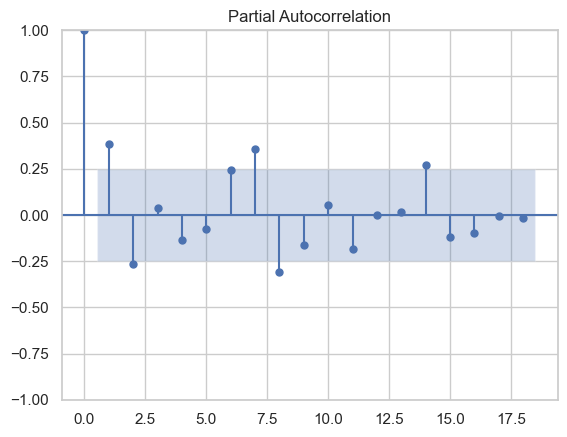

In [95]:
# СкидкаСуммойПроцентомСЛимитом
category_name = 'Крупная бытовая техника'
action_name = 'СкидкаСуммойПроцентомСЛимитом'

placed1 = placed[placed['TN'] == f'{category_name}'][['OrderDate', 'Quant']].set_index('OrderDate')
daily_sales = placed1.resample('D').sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Quant'], linewidth=3,c='cyan')
plt.title(f"Daily sales ({category_name})")
plt.xlabel("Date")
plt.ylabel("Quant")
plt.show()

check_stationarity(daily_sales['Quant'])

plot_acf(daily_sales)
plot_pacf(daily_sales)
plt.show()

stat = pd.DataFrame()
category1 = df[df['TN'] == f'{category_name}']
stat['OrderDate'] = category1['OrderDate']
stat['Quant'] = category1[f'{action_name}'] * category1['Quant']
stat = stat.groupby('OrderDate').sum()

action_active = pd.DataFrame(index=stat[stat['Quant'] > 10].index)
action_active['Action'] = 1

action_values = pd.DataFrame(index=stat.index).join(action_active, how='left')
action_values = action_values.fillna(0).reset_index().sort_values(by='OrderDate').set_index('OrderDate')

In [96]:
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 7

model = SARIMAX(daily_sales.iloc[:-14], exog=action_values['Action'][:-14], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


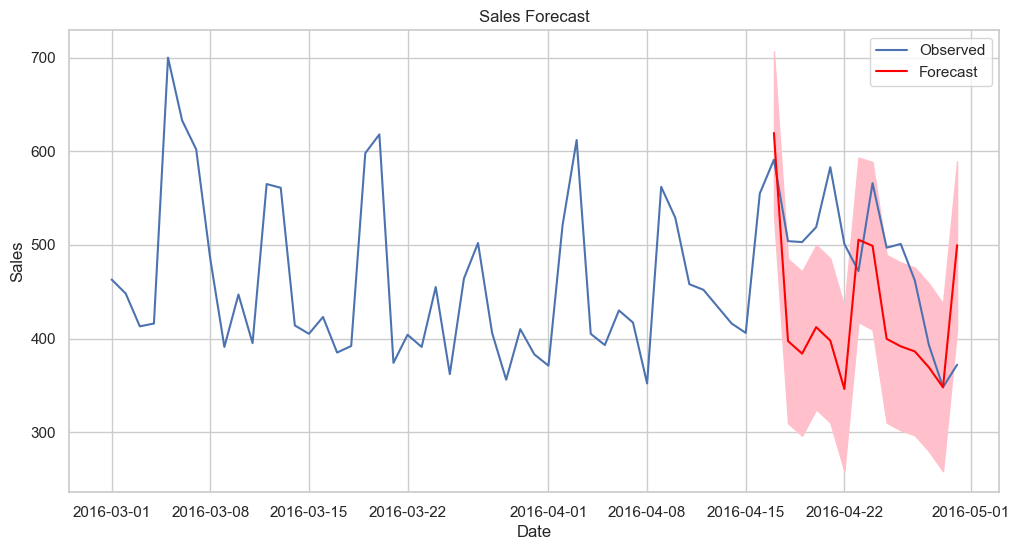

MAE: 88.29294449986617
MSE: 10413.813284667242
MAPE: 17.868938052080725


In [97]:
# Forecast future values
forecast_periods = 14  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods, exog=action_values['Action'][-14:])
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

observed = daily_sales[-14:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
mape = mean_absolute_percentage_error(observed, forecast_mean) * 100.0
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')

### Мелкая бытовая техника

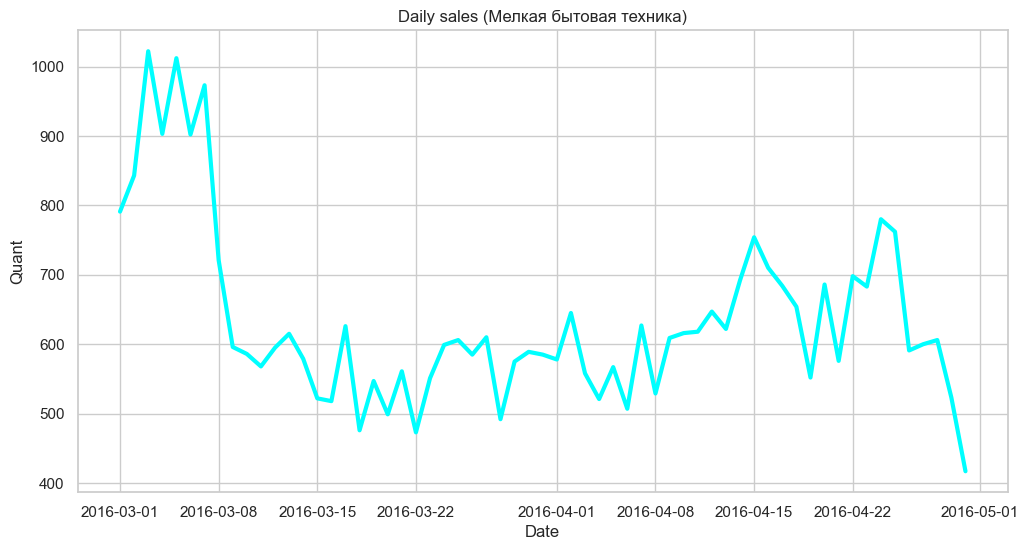

ADF Statistic: -1.8979020398554898
p-value: 0.33304870015795524
Non-Stationary


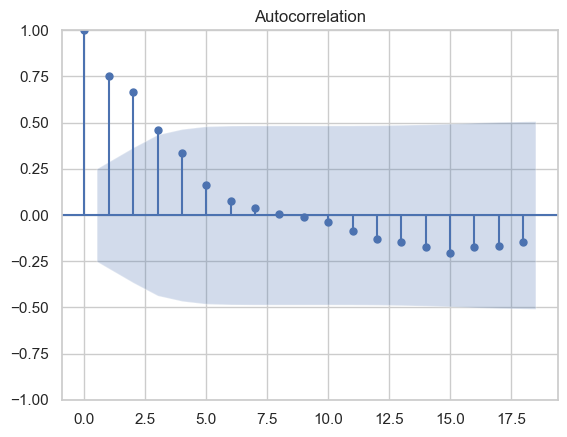

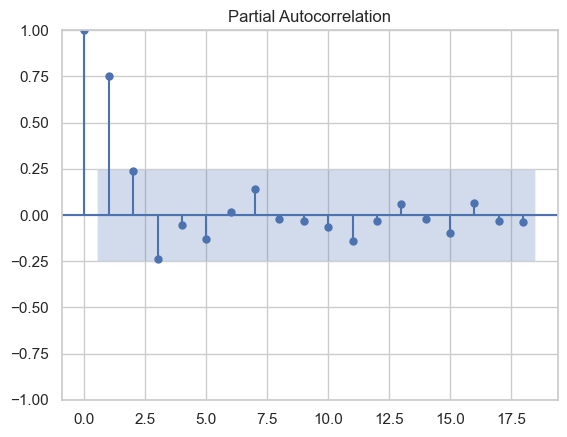

In [18]:
# СкидкаСуммойПроцентомСЛимитом
category_name = 'Мелкая бытовая техника'
action_name = 'СкидкаСуммойПроцентомСЛимитом'

placed1 = placed[placed['TN'] == f'{category_name}'][['OrderDate', 'Quant']].set_index('OrderDate')
daily_sales = placed1.resample('D').sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Quant'], linewidth=3,c='cyan')
plt.title(f"Daily sales ({category_name})")
plt.xlabel("Date")
plt.ylabel("Quant")
plt.show()

check_stationarity(daily_sales['Quant'])

plot_acf(daily_sales)
plot_pacf(daily_sales)
plt.show()

stat = pd.DataFrame()
category1 = df[df['TN'] == f'{category_name}']
stat['OrderDate'] = category1['OrderDate']
stat['Quant'] = category1[f'{action_name}'] * category1['Quant']
stat = stat.groupby('OrderDate').sum()

action_active = pd.DataFrame(index=stat[stat['Quant'] > 10].index)
action_active['Action'] = 1

action_values = pd.DataFrame(index=stat.index).join(action_active, how='left')
action_values = action_values.fillna(0).reset_index().sort_values(by='OrderDate').set_index('OrderDate')

In [19]:
p, d, q = 2, 1, 1
P, D, Q, s = 2, 1, 1, 7

model = SARIMAX(daily_sales.iloc[:-14], exog=action_values['Action'][:-14], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


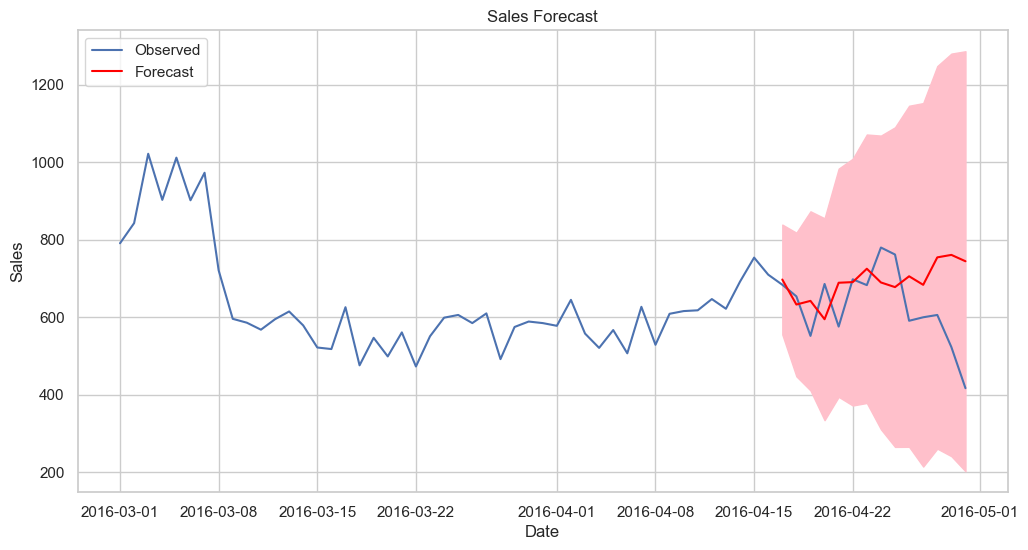

MAE: 104.68901478149486
MSE: 18084.669869940095
MAPE: 19.01976333973731


In [20]:
# Forecast future values
forecast_periods = 14  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods, exog=action_values['Action'][-14:])
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

observed = daily_sales[-14:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
mape = mean_absolute_percentage_error(observed, forecast_mean) * 100.0
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')

### Сделай сам

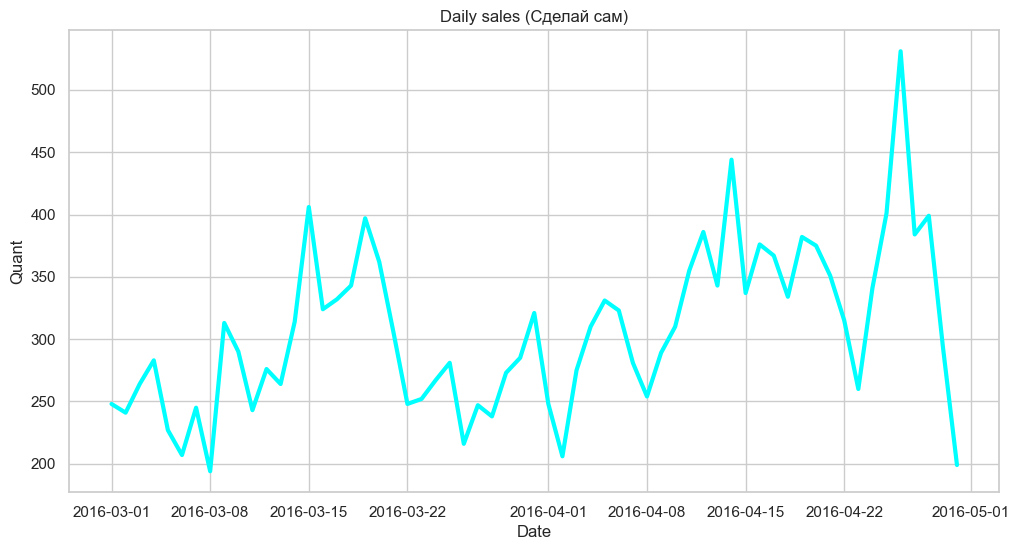

ADF Statistic: -3.4685485637263493
p-value: 0.008832541908316829
Stationary


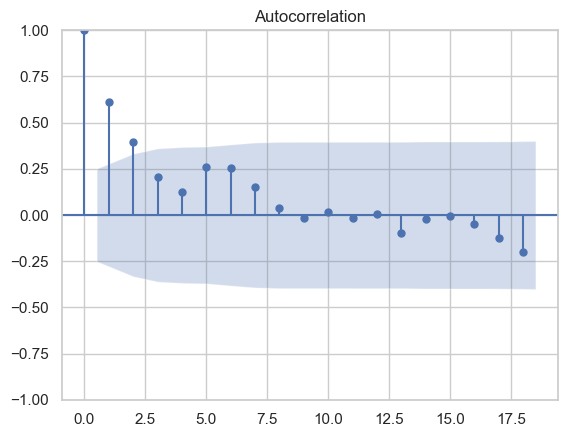

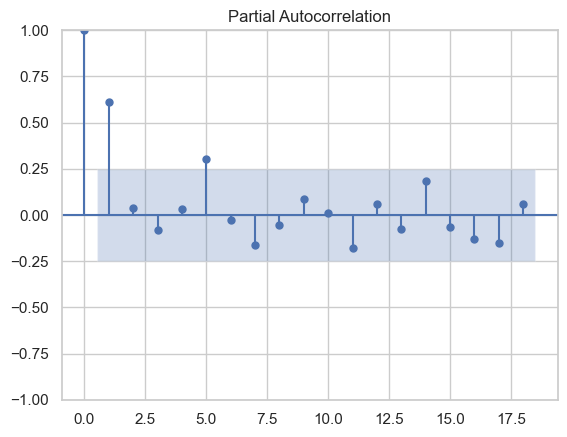

In [98]:
# СкидкаСуммойПроцентомСЛимитом
category_name = 'Сделай сам'
action_name = 'СкидкаСуммойПроцентомСЛимитом'

placed1 = placed[placed['TN'] == f'{category_name}'][['OrderDate', 'Quant']].set_index('OrderDate')
daily_sales = placed1.resample('D').sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Quant'], linewidth=3,c='cyan')
plt.title(f"Daily sales ({category_name})")
plt.xlabel("Date")
plt.ylabel("Quant")
plt.show()

check_stationarity(daily_sales['Quant'])

plot_acf(daily_sales)
plot_pacf(daily_sales)
plt.show()

stat = pd.DataFrame()
category1 = df[df['TN'] == f'{category_name}']
stat['OrderDate'] = category1['OrderDate']
stat['Quant'] = category1[f'{action_name}'] * category1['Quant']
stat = stat.groupby('OrderDate').sum()

action_active = pd.DataFrame(index=stat[stat['Quant'] > 10].index)
action_active['Action'] = 1

action_values = pd.DataFrame(index=stat.index).join(action_active, how='left')
action_values = action_values.fillna(0).reset_index().sort_values(by='OrderDate').set_index('OrderDate')

In [99]:
p, d, q = 2, 1, 1
P, D, Q, s = 2, 1, 1, 7

model = SARIMAX(daily_sales.iloc[:-14], exog=action_values['Action'][:-14], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


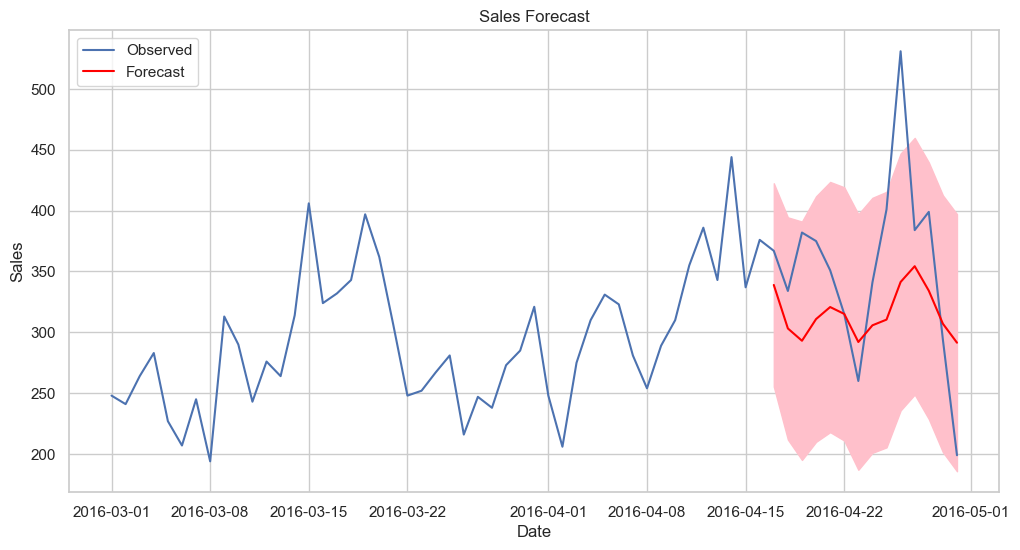

MAE: 56.40569106083227
MSE: 5348.953702275275
MAPE: 15.837377061857167


In [100]:
# Forecast future values
forecast_periods = 14  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods, exog=action_values['Action'][-14:])
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

observed = daily_sales[-14:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
mape = mean_absolute_percentage_error(observed, forecast_mean) * 100.0
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')

# С учетом кластеризации

In [21]:
clustering_results_1 = pd.read_csv('clustering_results_1.csv')
df_clustering_1 = df.join(clustering_results_1[['Phone_new', 'cluster']].set_index('Phone_new'), on='Phone_new')
df_clustering_1['cluster'].value_counts()

cluster
0    132143
5     31926
2     10321
4      5271
3      2753
1       611
6        47
Name: count, dtype: int64

Text(0.5, 1.0, 'Goods clustering_1_cluster_0')

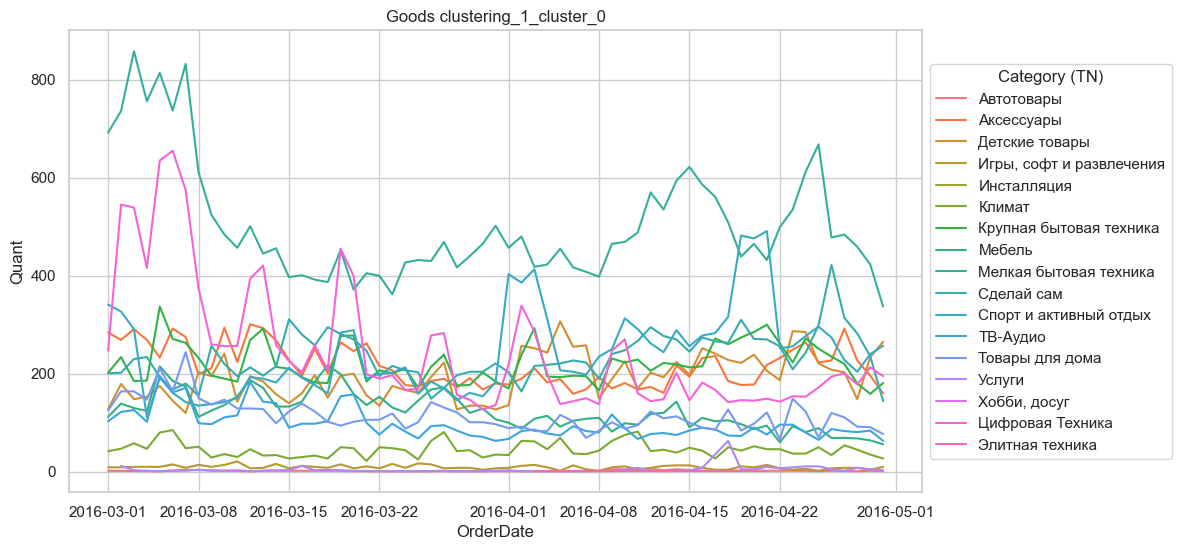

In [22]:
placed_clustering_1_cluster_0 = df_clustering_1[df_clustering_1['cluster'] == 0][['TN', 'OrderDate', 'Quant']].groupby(['TN', 'OrderDate']).sum().reset_index()
placed_clustering_1_cluster_0['OrderDate'] = pd.to_datetime(placed_clustering_1_cluster_0['OrderDate'])

sns.set(style="whitegrid")
plt.figure(figsize=(11, 6))
sns.lineplot(data=placed_clustering_1_cluster_0, x='OrderDate', y='Quant', hue='TN')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Category (TN)")
plt.title('Goods clustering_1_cluster_0')

Text(0.5, 1.0, 'Goods clustering_1_cluster_5')

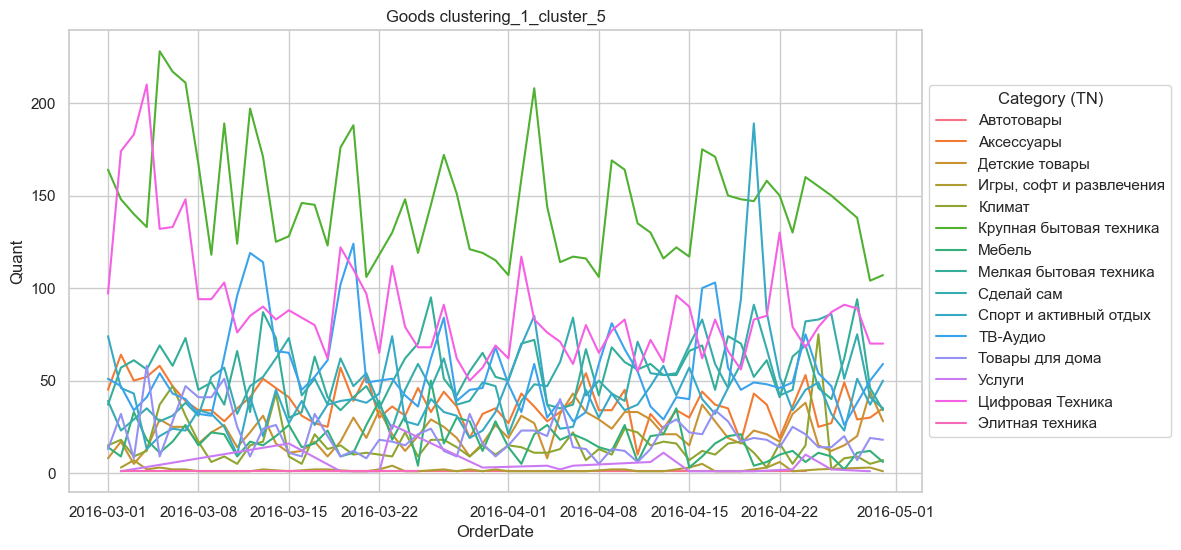

In [23]:
placed_clustering_1_cluster_5 = df_clustering_1[df_clustering_1['cluster'] == 5][['TN', 'OrderDate', 'Quant']].groupby(['TN', 'OrderDate']).sum().reset_index()
placed_clustering_1_cluster_5['OrderDate'] = pd.to_datetime(placed_clustering_1_cluster_5['OrderDate'])

sns.set(style="whitegrid")
plt.figure(figsize=(11, 6))
sns.lineplot(data=placed_clustering_1_cluster_5, x='OrderDate', y='Quant', hue='TN')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Category (TN)")
plt.title('Goods clustering_1_cluster_5')

### Крупная бытовая техника

/var/folders/bh/d932d5zj56z9_y_7lh3s66ndf1n4c9/T/ipykernel_26266/3176967147.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daily_sales = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\


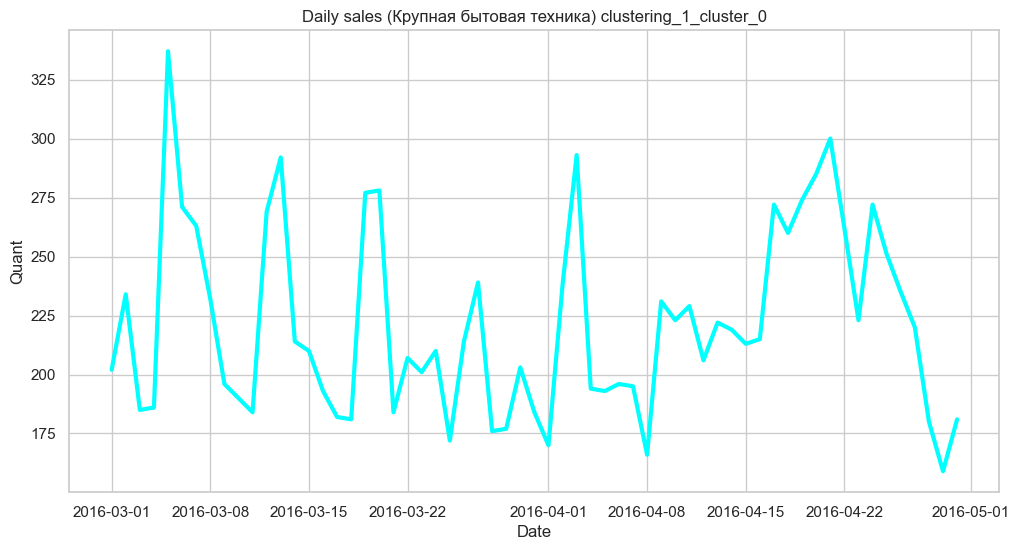

ADF Statistic: -2.8320161792227068
p-value: 0.05384401245629653
Non-Stationary


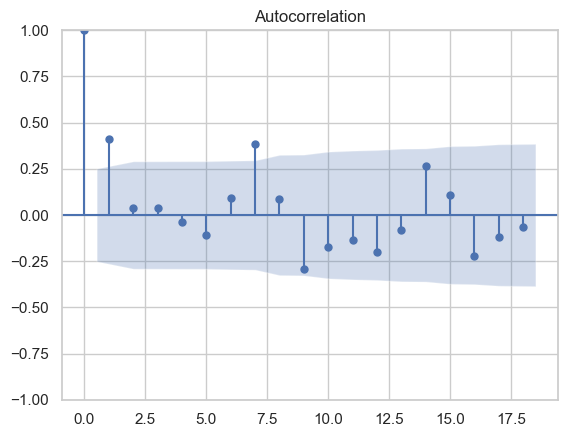

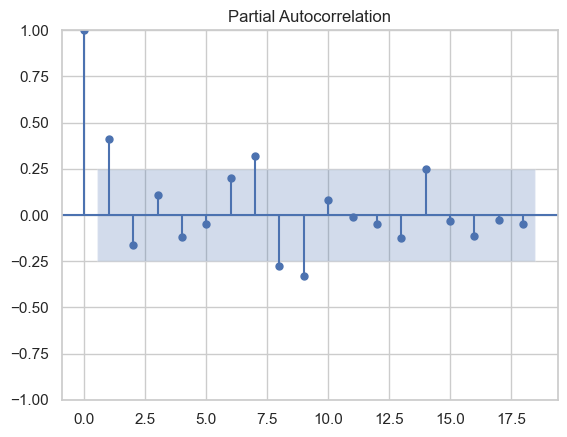

/var/folders/bh/d932d5zj56z9_y_7lh3s66ndf1n4c9/T/ipykernel_26266/3176967147.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category1 = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}']


In [124]:
cluster = 0
action_name = 'СкидкаСуммойПроцентомСЛимитом'
category_name = 'Крупная бытовая техника'

daily_sales = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\
    .groupby('OrderDate').sum()\
    .resample('D').sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Quant'], linewidth=3,c='cyan')
plt.title(f"Daily sales ({category_name}) clustering_1_cluster_{cluster}")
plt.xlabel("Date")
plt.ylabel("Quant")
plt.show()

check_stationarity(daily_sales['Quant'])

plot_acf(daily_sales)
plot_pacf(daily_sales)
plt.show()

stat = pd.DataFrame()
category1 = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}']
stat['OrderDate'] = category1['OrderDate']
stat['Quant'] = category1[f'{action_name}'] * category1['Quant']
stat = stat.groupby('OrderDate').sum()

action_active = pd.DataFrame(index=stat[stat['Quant'] > 10].index)
action_active['Action'] = 1

action_values = pd.DataFrame(index=stat.index).join(action_active, how='left')
action_values = action_values.fillna(0).reset_index().sort_values(by='OrderDate').set_index('OrderDate')

In [125]:
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 7

model = SARIMAX(daily_sales.iloc[:-14], exog=action_values['Action'][:-14], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


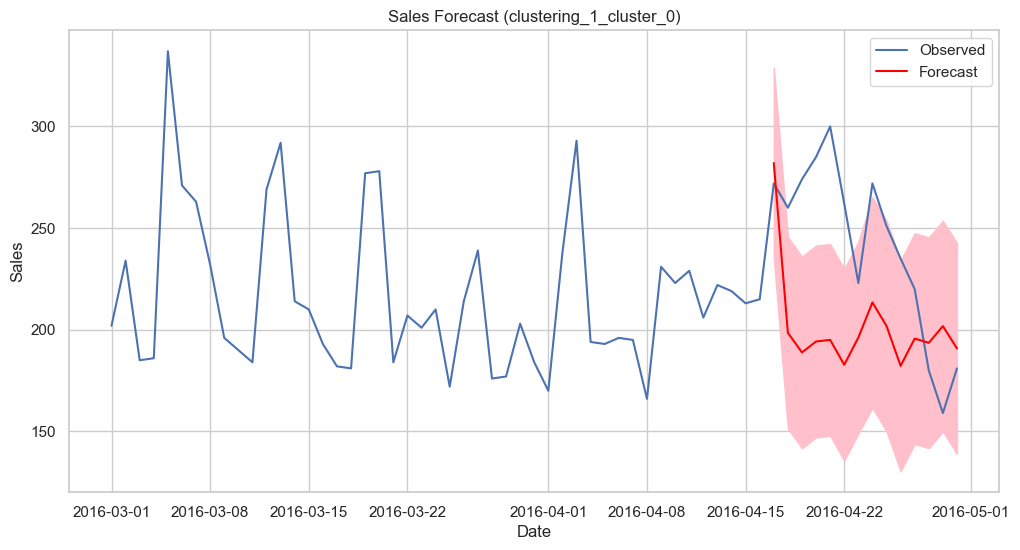

MAE: 50.67747732221494
MSE: 3480.3558631404626
MAPE: 20.14526793247083


In [126]:
# Forecast future values
forecast_periods = 14  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods, exog=action_values['Action'][-14:])
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title(f"Sales Forecast (clustering_1_cluster_{cluster})")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

observed = daily_sales[-14:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
mape = mean_absolute_percentage_error(observed, forecast_mean) * 100.0
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')

/var/folders/bh/d932d5zj56z9_y_7lh3s66ndf1n4c9/T/ipykernel_26266/752373674.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daily_sales = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\


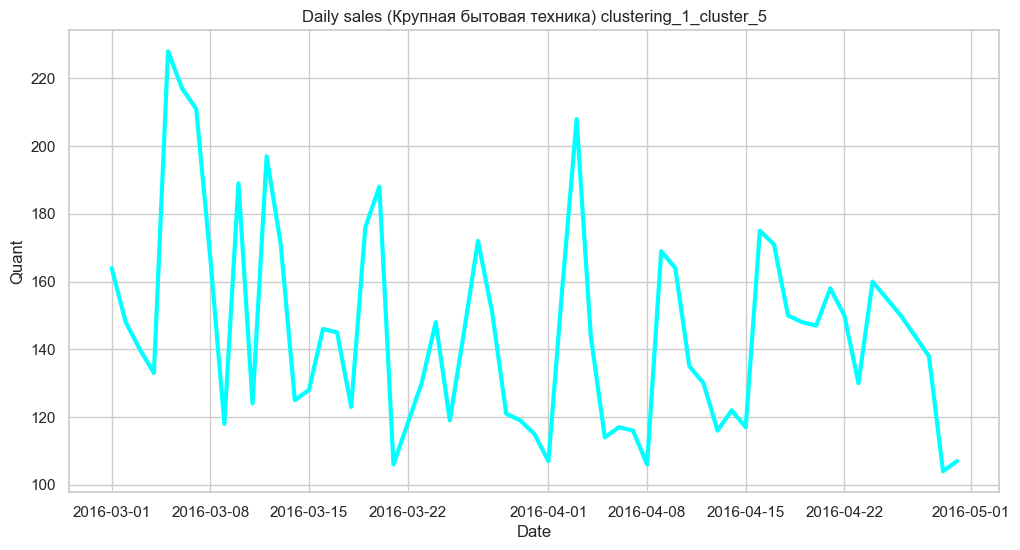

ADF Statistic: -2.60627743325527
p-value: 0.0917067780916726
Non-Stationary


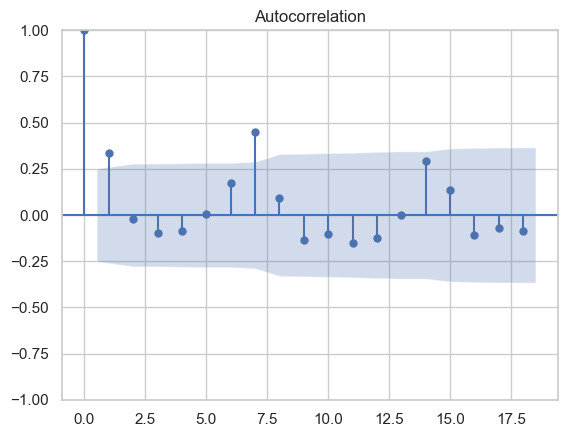

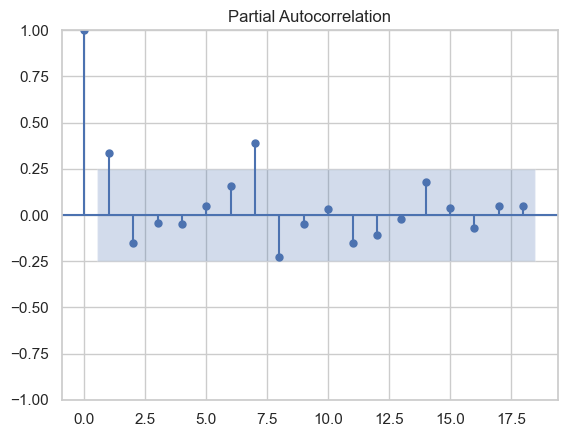

/var/folders/bh/d932d5zj56z9_y_7lh3s66ndf1n4c9/T/ipykernel_26266/752373674.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category1 = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}']


In [127]:
cluster = 5
action_name = 'СкидкаСуммойПроцентомСЛимитом'
category_name = 'Крупная бытовая техника'

daily_sales = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\
    .groupby('OrderDate').sum()\
    .resample('D').sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Quant'], linewidth=3,c='cyan')
plt.title(f"Daily sales ({category_name}) clustering_1_cluster_{cluster}")
plt.xlabel("Date")
plt.ylabel("Quant")
plt.show()

check_stationarity(daily_sales['Quant'])

plot_acf(daily_sales)
plot_pacf(daily_sales)
plt.show()

stat = pd.DataFrame()
category1 = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}']
stat['OrderDate'] = category1['OrderDate']
stat['Quant'] = category1[f'{action_name}'] * category1['Quant']
stat = stat.groupby('OrderDate').sum()

action_active = pd.DataFrame(index=stat[stat['Quant'] > 10].index)
action_active['Action'] = 1

action_values = pd.DataFrame(index=stat.index).join(action_active, how='left')
action_values = action_values.fillna(0).reset_index().sort_values(by='OrderDate').set_index('OrderDate')

In [128]:
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 7

model = SARIMAX(daily_sales.iloc[:-14], exog=action_values['Action'][:-14], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


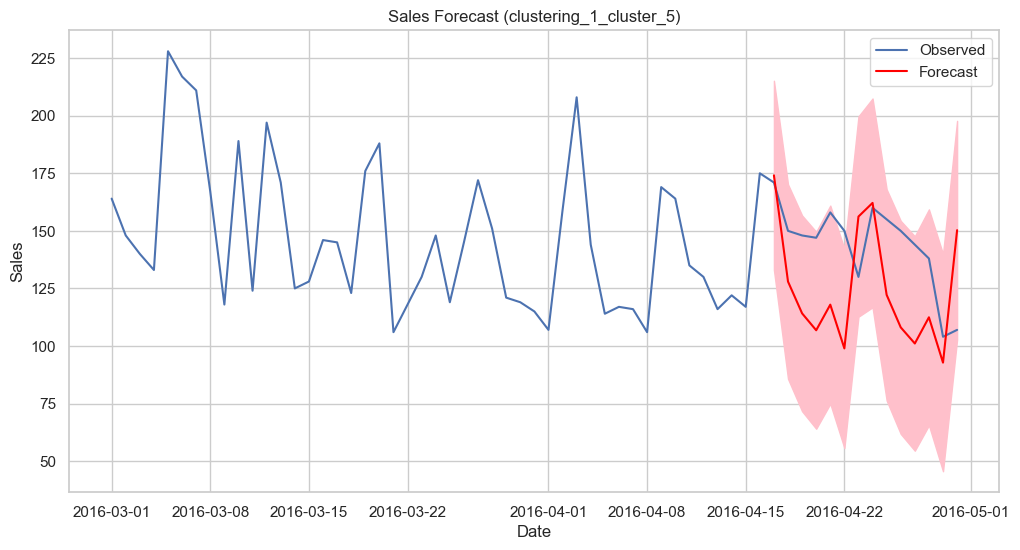

MAE: 29.73582801730378
MSE: 1105.9555052702112
MAPE: 21.161215291161533


In [129]:
# Forecast future values
forecast_periods = 14  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods, exog=action_values['Action'][-14:])
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Sales Forecast (clustering_1_cluster_5)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

observed = daily_sales[-14:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
mape = mean_absolute_percentage_error(observed, forecast_mean) * 100.0
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')

In [144]:
action_values

,Action
OrderDate,
2016-03-01,0.0
2016-03-02,0.0
2016-03-03,0.0
2016-03-04,0.0
2016-03-05,0.0
...,...
2016-04-26,1.0
2016-04-27,1.0
2016-04-28,1.0


### Мелкая бытовая техника

/var/folders/bh/d932d5zj56z9_y_7lh3s66ndf1n4c9/T/ipykernel_39616/1540902803.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daily_sales = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\


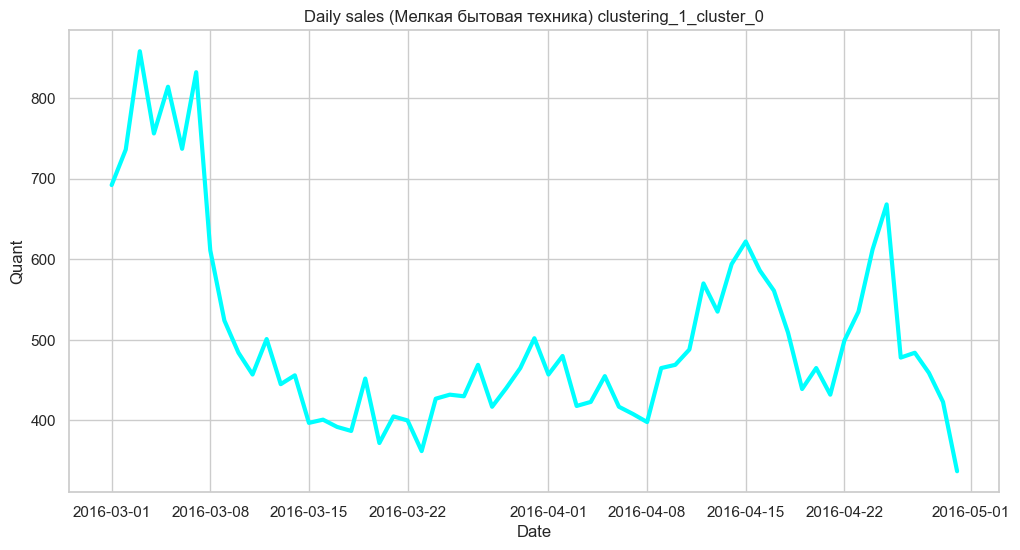

ADF Statistic: -2.146945592930254
p-value: 0.22606107134813813
Non-Stationary


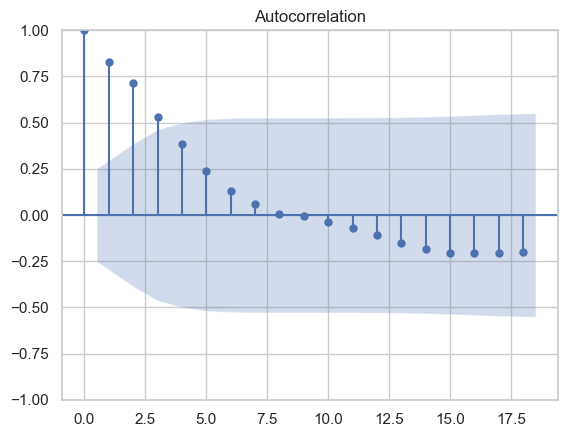

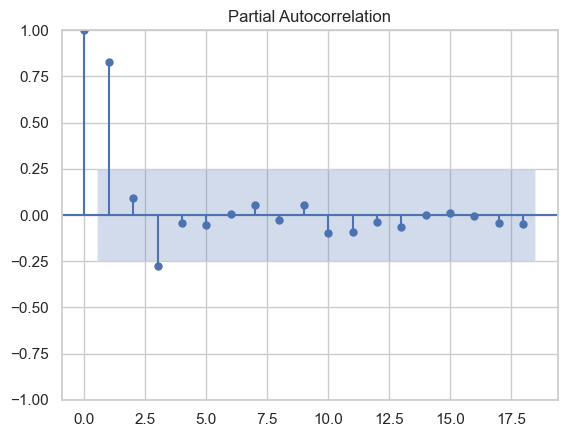

/var/folders/bh/d932d5zj56z9_y_7lh3s66ndf1n4c9/T/ipykernel_39616/1540902803.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category1 = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}']


In [24]:
cluster = 0
action_name = 'СкидкаСуммойПроцентомСЛимитом'
category_name = 'Мелкая бытовая техника'

daily_sales = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\
    .groupby('OrderDate').sum()\
    .resample('D').sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Quant'], linewidth=3,c='cyan')
plt.title(f"Daily sales ({category_name}) clustering_1_cluster_{cluster}")
plt.xlabel("Date")
plt.ylabel("Quant")
plt.show()

check_stationarity(daily_sales['Quant'])

plot_acf(daily_sales)
plot_pacf(daily_sales)
plt.show()

stat = pd.DataFrame()
category1 = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}']
stat['OrderDate'] = category1['OrderDate']
stat['Quant'] = category1[f'{action_name}'] * category1['Quant']
stat = stat.groupby('OrderDate').sum()

action_active = pd.DataFrame(index=stat[stat['Quant'] > 10].index)
action_active['Action'] = 1

action_values = pd.DataFrame(index=stat.index).join(action_active, how='left')
action_values = action_values.fillna(0).reset_index().sort_values(by='OrderDate').set_index('OrderDate')

In [ ]:
p, d, q = 2, 1, 1
P, D, Q, s = 2, 1, 1, 7

model = SARIMAX(daily_sales.iloc[:-14], exog=action_values['Action'][:-14], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting

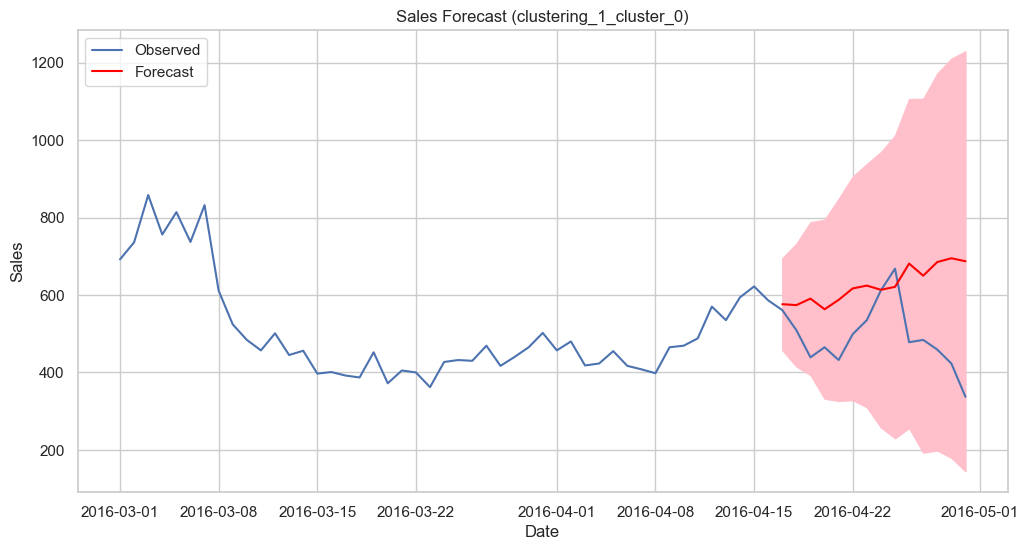

MAE: 139.82477134957148
MSE: 28681.87383640664
MAPE: 32.05414458091841


In [26]:
# Forecast future values
forecast_periods = 14  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods, exog=action_values['Action'][-14:])
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title(f"Sales Forecast (clustering_1_cluster_{cluster})")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

observed = daily_sales[-14:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
mape = mean_absolute_percentage_error(observed, forecast_mean) * 100.0
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')

/var/folders/bh/d932d5zj56z9_y_7lh3s66ndf1n4c9/T/ipykernel_39616/303233285.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daily_sales = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\


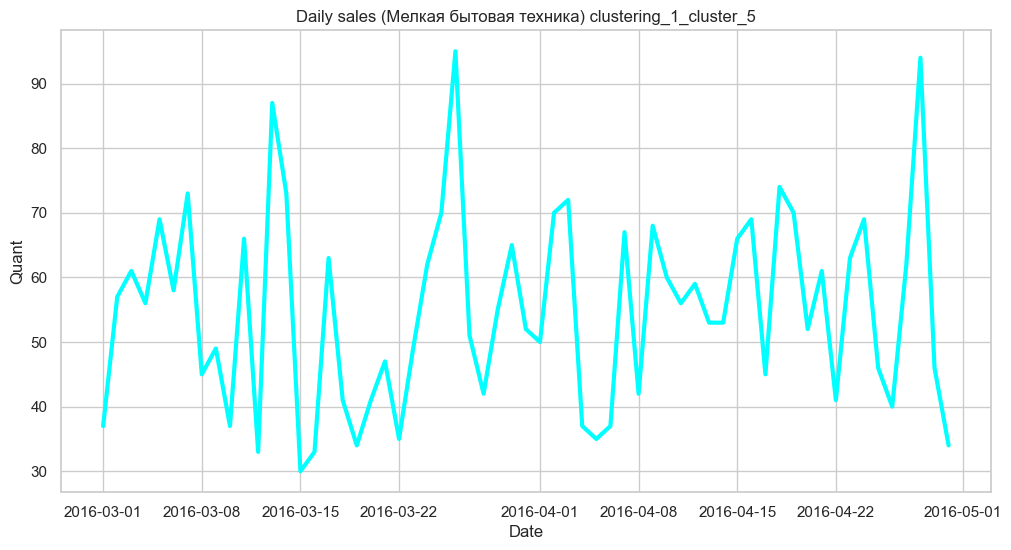

ADF Statistic: -6.291501893542473
p-value: 3.589932701611432e-08
Stationary


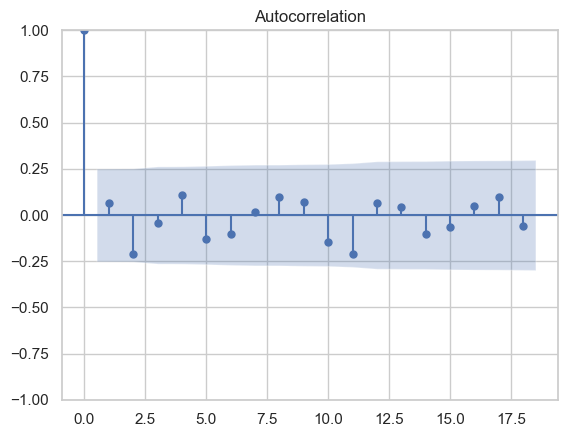

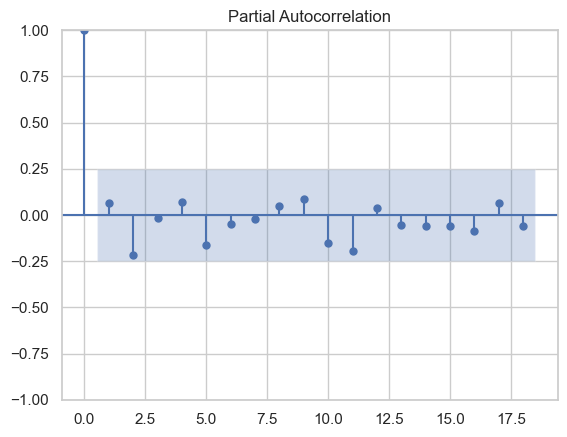

/var/folders/bh/d932d5zj56z9_y_7lh3s66ndf1n4c9/T/ipykernel_39616/303233285.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category1 = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}']


In [27]:
cluster = 5
action_name = 'СкидкаСуммойПроцентомСЛимитом'
category_name = 'Мелкая бытовая техника'

daily_sales = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\
    .groupby('OrderDate').sum()\
    .resample('D').sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Quant'], linewidth=3,c='cyan')
plt.title(f"Daily sales ({category_name}) clustering_1_cluster_{cluster}")
plt.xlabel("Date")
plt.ylabel("Quant")
plt.show()

check_stationarity(daily_sales['Quant'])

plot_acf(daily_sales)
plot_pacf(daily_sales)
plt.show()

stat = pd.DataFrame()
category1 = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}']
stat['OrderDate'] = category1['OrderDate']
stat['Quant'] = category1[f'{action_name}'] * category1['Quant']
stat = stat.groupby('OrderDate').sum()

action_active = pd.DataFrame(index=stat[stat['Quant'] > 10].index)
action_active['Action'] = 1

action_values = pd.DataFrame(index=stat.index).join(action_active, how='left')
action_values = action_values.fillna(0).reset_index().sort_values(by='OrderDate').set_index('OrderDate')

In [28]:
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 7

model = SARIMAX(daily_sales.iloc[:-14], exog=action_values['Action'][:-14], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


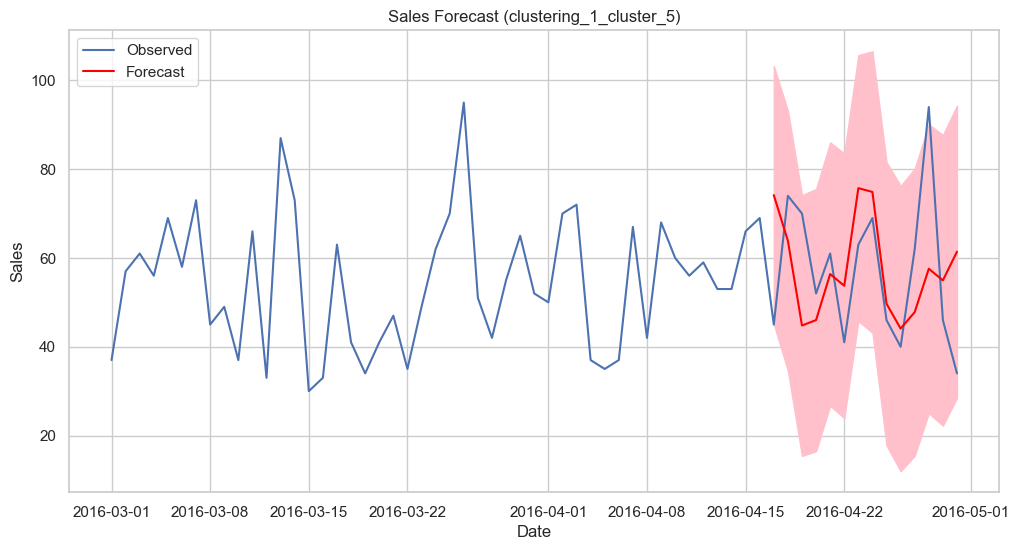

MAE: 14.372857107470633
MSE: 313.9116821103748
MAPE: 26.6689786771179


In [29]:
# Forecast future values
forecast_periods = 14  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods, exog=action_values['Action'][-14:])
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title(f"Sales Forecast (clustering_1_cluster_{cluster})")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

observed = daily_sales[-14:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
mape = mean_absolute_percentage_error(observed, forecast_mean) * 100.0
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')

### Сделай сам

/var/folders/bh/d932d5zj56z9_y_7lh3s66ndf1n4c9/T/ipykernel_26266/1567505400.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daily_sales = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\


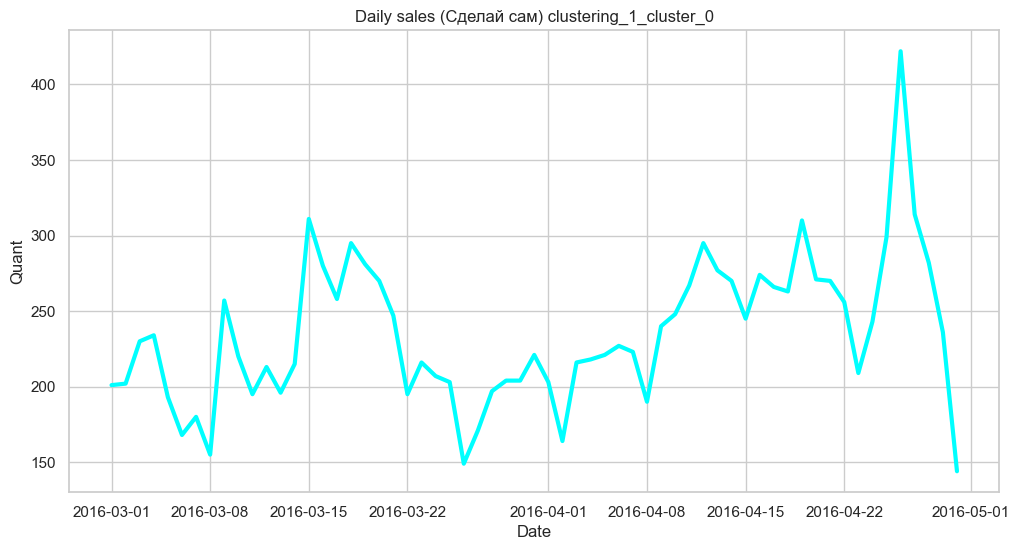

ADF Statistic: -3.2826010325472113
p-value: 0.015674349894964343
Stationary


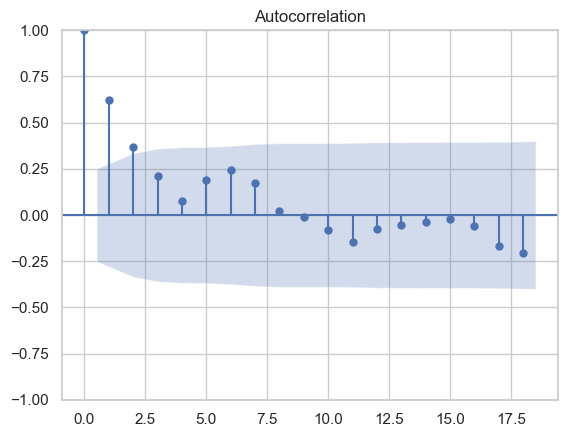

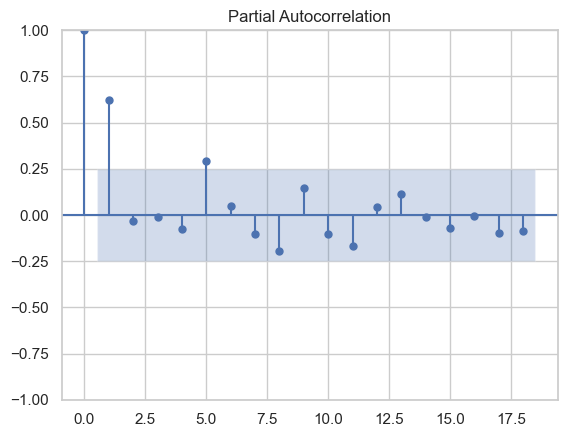

/var/folders/bh/d932d5zj56z9_y_7lh3s66ndf1n4c9/T/ipykernel_26266/1567505400.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category1 = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}']


In [130]:
cluster = 0
action_name = 'СкидкаСуммойПроцентомСЛимитом'
category_name = 'Сделай сам'

daily_sales = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\
    .groupby('OrderDate').sum()\
    .resample('D').sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Quant'], linewidth=3,c='cyan')
plt.title(f"Daily sales ({category_name}) clustering_1_cluster_{cluster}")
plt.xlabel("Date")
plt.ylabel("Quant")
plt.show()

check_stationarity(daily_sales['Quant'])

plot_acf(daily_sales)
plot_pacf(daily_sales)
plt.show()

stat = pd.DataFrame()
category1 = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}']
stat['OrderDate'] = category1['OrderDate']
stat['Quant'] = category1[f'{action_name}'] * category1['Quant']
stat = stat.groupby('OrderDate').sum()

action_active = pd.DataFrame(index=stat[stat['Quant'] > 10].index)
action_active['Action'] = 1

action_values = pd.DataFrame(index=stat.index).join(action_active, how='left')
action_values = action_values.fillna(0).reset_index().sort_values(by='OrderDate').set_index('OrderDate')

In [131]:
p, d, q = 2, 1, 1
P, D, Q, s = 2, 1, 1, 7

model = SARIMAX(daily_sales.iloc[:-14], exog=action_values['Action'][:-14], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


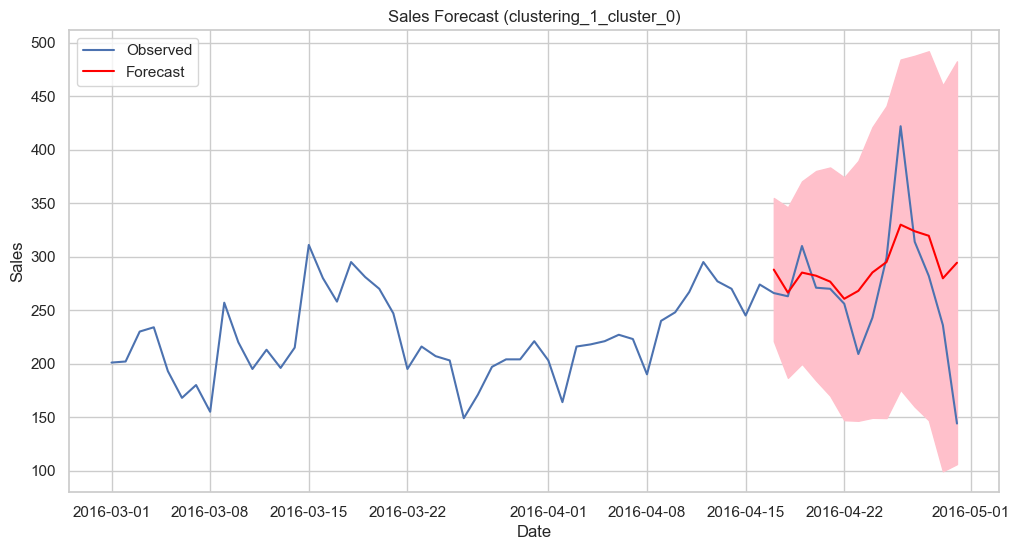

MAE: 36.544784630168905
MSE: 2935.4534562598574
MAPE: 16.72865692253104


In [132]:
# Forecast future values
forecast_periods = 14  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods, exog=action_values['Action'][-14:])
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title(f"Sales Forecast (clustering_1_cluster_{cluster})")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

observed = daily_sales[-14:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
mape = mean_absolute_percentage_error(observed, forecast_mean) * 100.0
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')

/var/folders/bh/d932d5zj56z9_y_7lh3s66ndf1n4c9/T/ipykernel_26266/2525149438.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daily_sales = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\


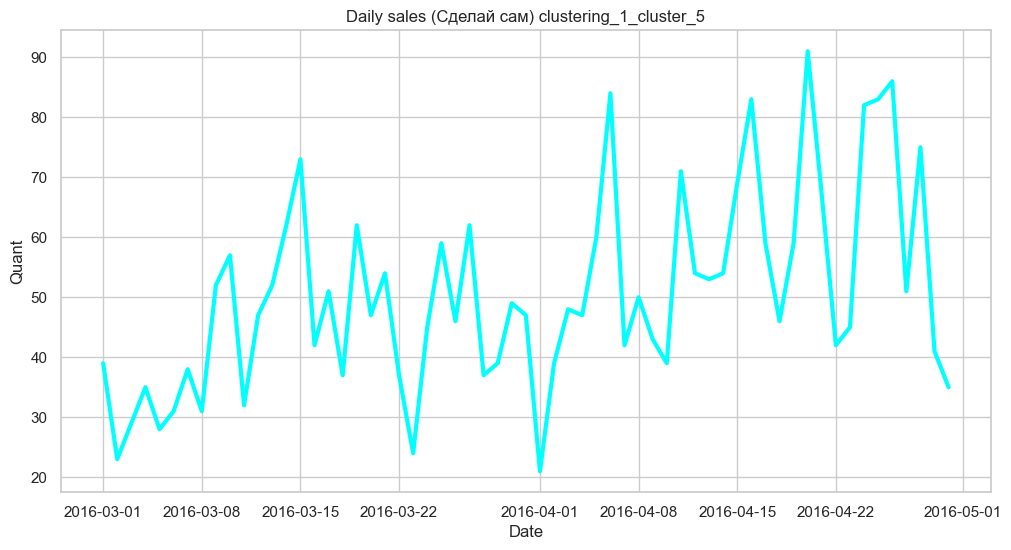

ADF Statistic: -4.886964213264134
p-value: 3.69702300323564e-05
Stationary


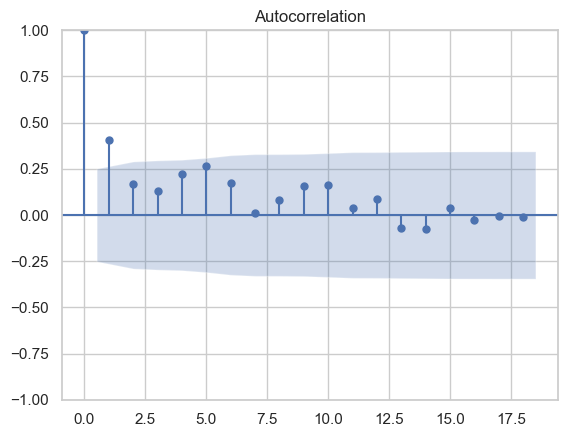

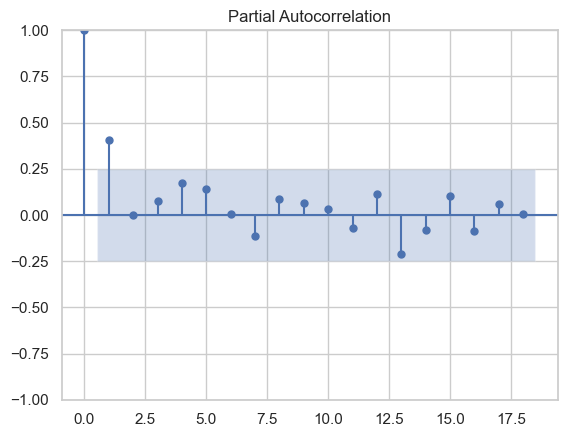

/var/folders/bh/d932d5zj56z9_y_7lh3s66ndf1n4c9/T/ipykernel_26266/2525149438.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  category1 = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}']


In [133]:
cluster = 5
action_name = 'СкидкаСуммойПроцентомСЛимитом'
category_name = 'Сделай сам'

daily_sales = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}'][['OrderDate', 'Quant']]\
    .groupby('OrderDate').sum()\
    .resample('D').sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Quant'], linewidth=3,c='cyan')
plt.title(f"Daily sales ({category_name}) clustering_1_cluster_{cluster}")
plt.xlabel("Date")
plt.ylabel("Quant")
plt.show()

check_stationarity(daily_sales['Quant'])

plot_acf(daily_sales)
plot_pacf(daily_sales)
plt.show()

stat = pd.DataFrame()
category1 = df_clustering_1[df_clustering_1['cluster'] == cluster][df_clustering_1['TN'] == f'{category_name}']
stat['OrderDate'] = category1['OrderDate']
stat['Quant'] = category1[f'{action_name}'] * category1['Quant']
stat = stat.groupby('OrderDate').sum()

action_active = pd.DataFrame(index=stat[stat['Quant'] > 10].index)
action_active['Action'] = 1

action_values = pd.DataFrame(index=stat.index).join(action_active, how='left')
action_values = action_values.fillna(0).reset_index().sort_values(by='OrderDate').set_index('OrderDate')

In [142]:
p, d, q = 2, 1, 1
P, D, Q, s = 2, 1, 1, 7

model = SARIMAX(daily_sales.iloc[:-14], exog=action_values['Action'][:-14], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/timurratnikov/diplom_electronice/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


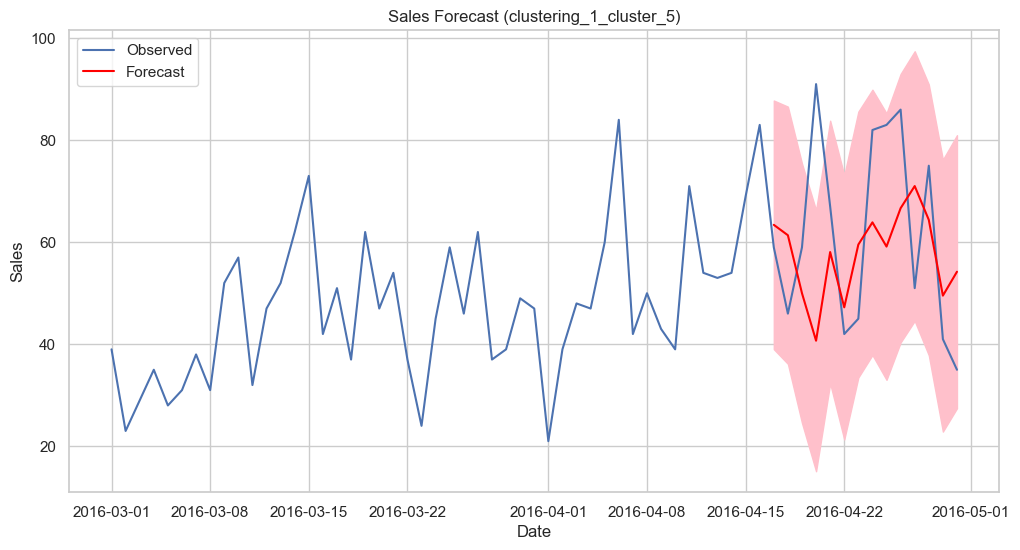

MAE: 16.246176559733748
MSE: 386.5439723522887
MAPE: 26.56568248796568


In [141]:
# Forecast future values
forecast_periods = 14  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods, exog=action_values['Action'][-14:])
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title(f"Sales Forecast (clustering_1_cluster_{cluster})")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

observed = daily_sales[-14:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
mape = mean_absolute_percentage_error(observed, forecast_mean) * 100.0
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')